In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from collections.abc import Callable
from dataclasses import dataclass

@dataclass
class KDE:
  data: np.ndarray
  kernel_func: Callable
  h: float = 0.05
  """Should handle both floats and np.arrays"""

  @property
  def n(self) -> float:
    """len of data"""
    return self.data.shape[0]

  def set_h(self, h: float) -> None:
    """Change h value"""
    self.h = h

  def predict(self, point: float | np.ndarray) -> float:
    """Returns Density given a point or points"""

    return (1 / (self.n * self.h)) * self.kernel_func((self.data - np.expand_dims(point, axis=-1)) / self.h).sum(axis=-1)

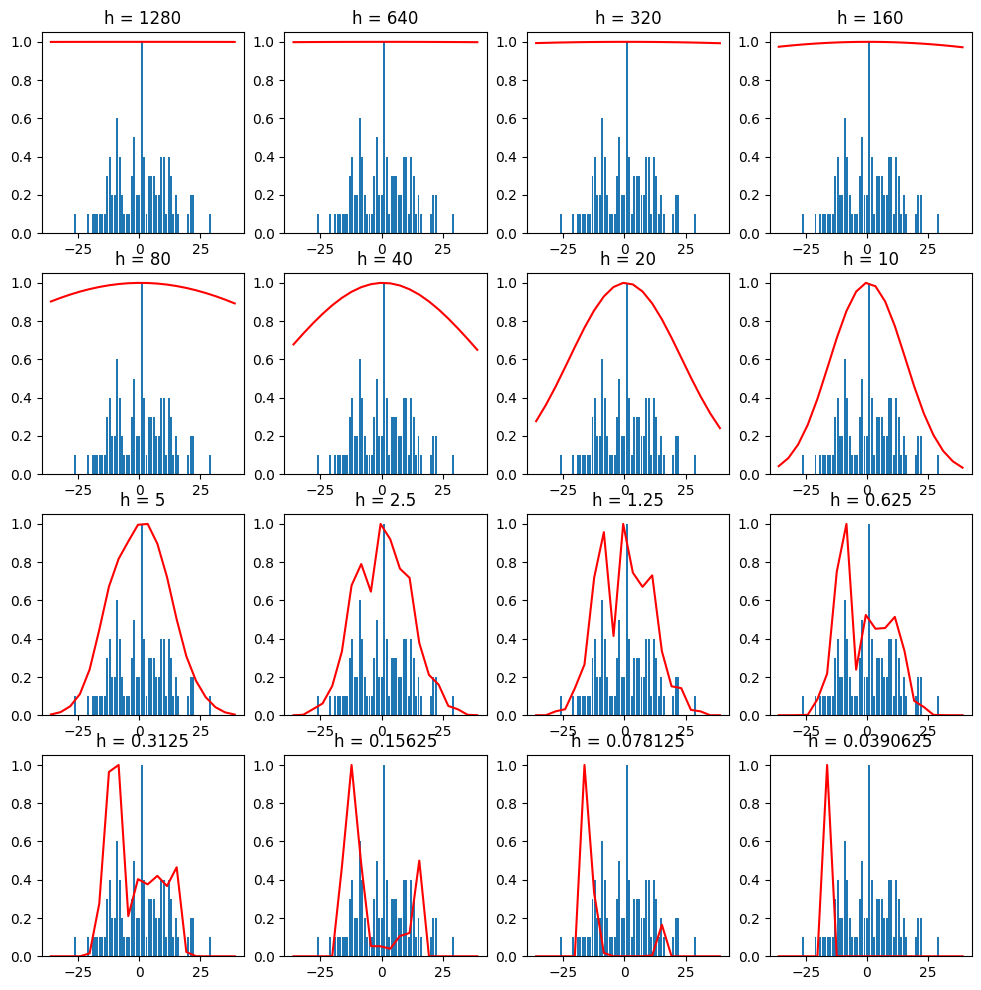

In [ ]:
import math

n: int = 100
low = -10
high = 10
mean = 0
std = 10
data = np.round(np.random.normal(loc=mean, scale=std, size=(n,)))# np.random.randint(low=low, high=high, size=(n,))

counts = np.unique(data, return_counts=True)
values = counts[0]
norm_num = counts[1] / counts[1].max()

# Gaussian
kernel_func: Callable = lambda x: (1 / (2 * math.pi) * (math.e ** -((x ** 2) / 2)))

gaussian_estimator = KDE(data=data, kernel_func=kernel_func, h=0.05)

fig, axs = plt.subplots(4, 4, figsize=(12, 12))
axs = axs.flatten()

for i in range(16):

  hi = 5 * 2 ** (8 - i)

  ai = axs[i]

  ai.set_title(f"h = {hi}")

  ai.bar(values, norm_num)

  x = np.linspace(data.min() - 10, data.max() + 10, (high-low))
  gaussian_estimator.set_h(hi)
  p = gaussian_estimator.predict(x)
  y = p / p.max()

  ai.plot(x, y, color='red')